Определяем библиотеки для дальнейшей работы:

In [3]:
import numpy as np
import matplotlib.pyplot as plt

Задаём функцию:

In [4]:
def f(x):
    return -12*x**4*np.sin(np.cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30

Определяем корни:

In [5]:
roots = np.roots([-12,0,-18,5,10,-30])
print("Корни: ", roots)

Корни:  [-0.25325532+1.50956257j -0.25325532-1.50956257j -1.04111914+0.j
  0.77381489+0.65277341j  0.77381489-0.65277341j]


Находим интервалы, на которых функция возрастает:

Производная функции:

In [6]:
def f_prime(x):
    return -48*x**3*np.sin(np.cos(x)) + 12*x**3*np.sin(np.sin(x))*np.cos(x) - 54*x**2 + 10

In [7]:
inc_intervals = []
for i in range(len(roots)):
    if f_prime(roots[i]-0.01) > 0 and f_prime(roots[i]+0.01) > 0:
        x_l = roots[i]-0.01
        while f_prime(x_l) > 0:
            x_l -= 0.01
        x_r = roots[i]+0.01
        while f_prime(x_r) > 0:
            x_r += 0.01
        inc_intervals.append((x_l, x_r))
print("Интервалы, на которых функция возрастает: ", inc_intervals)

Интервалы, на которых функция возрастает:  [((-0.3432553176936566+1.5095625715873648j), (0.4067446823063438+1.5095625715873648j)), ((-0.3432553176936566-1.5095625715873648j), (0.4067446823063438-1.5095625715873648j)), ((-0.40618511008909447+0.6527734053287538j), (0.8038148899109063+0.6527734053287538j)), ((-0.40618511008909447-0.6527734053287538j), (0.8038148899109063-0.6527734053287538j))]


Находим интервалы, на которых функция убывает:

In [8]:
dec_intervals = []
for i in range(len(roots)):
    if f_prime(roots[i]-0.01) < 0 and f_prime(roots[i]+0.01) < 0:
        x_l = roots[i]-0.01
        while f_prime(x_l) < 0:
            x_l -= 0.01
        x_r = roots[i]+0.01
        while f_prime(x_r) < 0:
            x_r += 0.01
        dec_intervals.append((x_l, x_r))
print("Интервалы, на которых функция убывает: ", dec_intervals)


Интервалы, на которых функция убывает:  [((-5.011119144434438+0j), (-0.5711191444345005+0j))]


Построим график функции:

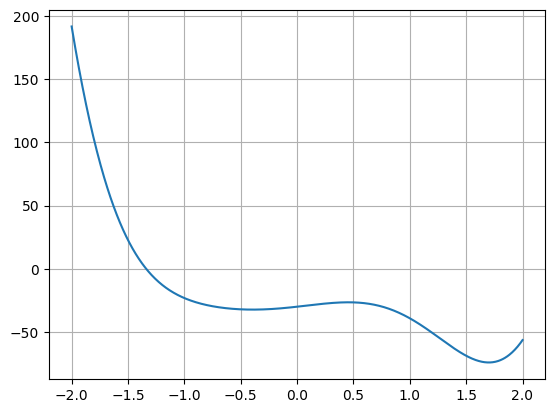

In [9]:
x = np.linspace(-2,2,1000)
y = f(x)
plt.plot(x, y)
plt.grid(True)
plt.show()

Вычисляем вершину:

In [10]:
from scipy.optimize import minimize_scalar
res = minimize_scalar(f)
print("Вершина: (", res.x, ", ", res.fun, ")")

Вершина: ( 1.7006072856678967 ,  -74.10629308610869 )


Определяем промежутки, на котором f > 0:

In [11]:
pos_intervals = []
prev_x = x[0]
prev_y = y[0]
for i in range(1,len(x)):
    if prev_y <= 0 and y[i] > 0:
        x_l = prev_x
        x_r = x[i]
        while abs(f((x_l+x_r)/2)) > 0.001:
            if f((x_l+x_r)/2) > 0:
                x_l = (x_l+x_r)/2
            else:
                x_r = (x_l+x_r)/2
        pos_intervals.append((x_l, x_r))
    prev_x = x[i]
    prev_y = y[i]
    
print("Промежутки, на которых f > 0: ", pos_intervals)

Промежутки, на которых f > 0:  []


Определяем промежутки, на котором f < 0:

In [ ]:
neg_intervals = []
prev_x = x[0]
prev_y = y[0]
for i in range(1,len(x)):
    if prev_y >= 0 and y[i] < 0:
        x_l = prev_x
        x_r = x[i]
        while abs(f((x_l+x_r)/2)) > 0.001:
            if f((x_l+x_r)/2) < 0:
                x_l = (x_l+x_r)/2
            else:
                x_r = (x_l+x_r)/2
        neg_intervals.append((x_l, x_r))
    prev_x = x[i]
    prev_y = y[i]
    
print("Промежутки, на которых f < 0: ", neg_intervals)